<a href="http://landlab.github.io"><img style="float: left" src="https://raw.githubusercontent.com/landlab/tutorials/master/landlab_header.png"></a>

# Using Hex Graphs

<hr>
<small> For instructions on how to run an interactive iPython notebook, click here: <a href="https://github.com/landlab/tutorials/blob/master/README.md">https://github.com/landlab/tutorials/blob/master/README.md</a></small><br>
<small>For more Landlab tutorials, click here: <a href="https://github.com/landlab/landlab/wiki/Tutorials">https://github.com/landlab/landlab/wiki/Tutorials</a></small>
<hr>

In this example we will:
* create two different type of hexagonal graph structures
* learn about the element of the graph

A bit of magic so that we can plot within this notebook.

In [1]:
%matplotlib inline
import numpy as np

## Create a grid

As with the other graph structures, they are stored in landlab's `graph` sub-package. The hexagonal graphs are created with the `DualHexGraph` class (the `HexGraph` also works but will only have *nodes*, *links*, and *patches*).

In [2]:
from landlab.graph import DualHexGraph
from landlab.plot.graph import plot_graph

`HexGraph`s require a shape argument that specifies the size of the graph. This is a tuple of `int`s where the first value is the number of node rows and the second the number of nodes in the first row of the graph. The default `orientation` is `'horizontal'` so we don't have to provide it here but we will anyway (further down we see what a vertically-oriented hex graph looks like).

In [3]:
graph = DualHexGraph((3, 4), spacing=2, origin=(-1, 0), orientation='horizontal')

## Visualize the grid

To see what our graph looks like (along with IDs for the graph elements) use the `plot_graph` function. the `at` keyword specifies what elements to plot. To keep things from getting too crowded we'll plot the node-graph and its dual graph separately (you could do it all in one, if you like).

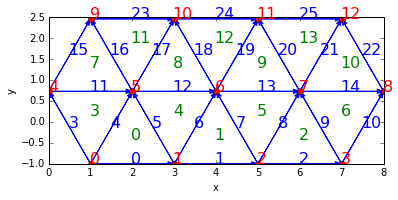

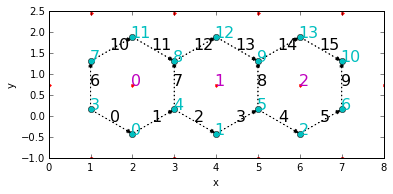

In [4]:
plot_graph(graph, at='node,link,patch')
plot_graph(graph, at='corner,face,cell')

Now we create a vertically-oriented `HexGraph`. Notice now that the nodes are staggered in the y-dimension.

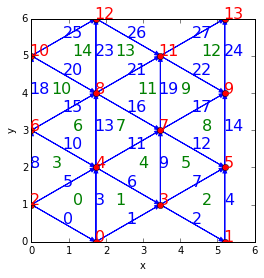

In [5]:
graph = DualHexGraph((3, 4), spacing=2., origin=(0, 0), orientation='vertical')
plot_graph(graph, at='node,link,patch')

## Elements of the grid

We'll now look at some of the elements of our hex grid. We'll begin by creating a simple grid and plotting the elements from its node-grid.

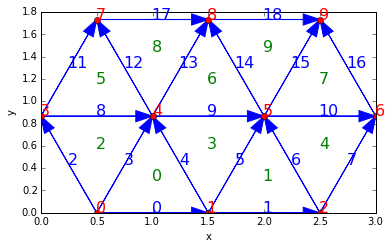

In [6]:
graph = DualHexGraph((3, 3))
plot_graph(graph, at='node,link,patch')

The x and y positions of each node is provided by the attributes `x_of_node` and `y_of_node`. The names may seem a little clunky but they follow a syntax that is used throughout landlab. In landlab, if you see a method name that contains `_of_` you will know that the thing to the left of it is a quantity (in this case x or y) and the thing to the right is a graph element (in this case a node) at which the quantity is measured.

In [7]:
zip(graph.x_of_node, graph.y_of_node)

[(0.5, 0.0),
 (1.5, 0.0),
 (2.5, 0.0),
 (0.0, 0.86602540378399995),
 (1.0, 0.86602540378399995),
 (2.0, 0.86602540378399995),
 (3.0, 0.86602540378399995),
 (0.5, 1.732050807569),
 (1.5, 1.732050807569),
 (2.5, 1.732050807569)]

Another quantity is angle. Here we get the angles of all the links. Note that angles are measured *math-style*. That is, in radians as measured counter-clockwise starting from the positive x-axis. The elements of this array correspond to the numbered links in the above plot.

In [8]:
graph.angle_of_link * 180 / np.pi

array([ 360.,  360.,  120.,   60.,  120.,   60.,  120.,   60.,  360.,
        360.,  360.,   60.,  120.,   60.,  120.,   60.,  120.,  360.,  360.])

You can also see how the elements of the graph relate to one another. For instance, to get the nodes that define each patch, use the `nodes_at_patch` attribute. Notice now that instead of the `_of_` separator we use the `_at_` separator. This indicates that you are getting the ID or one element as it relates to another. Thus, the returned array will always contain `int`s and be of length equal to the number of items of the element named after the `_at_`.

In [9]:
graph.nodes_at_patch

array([[4, 0, 1],
       [5, 1, 2],
       [4, 3, 0],
       [5, 4, 1],
       [6, 5, 2],
       [7, 3, 4],
       [8, 4, 5],
       [9, 5, 6],
       [8, 7, 4],
       [9, 8, 5]])

In [10]:
graph.nodes_at_link

array([[0, 1],
       [1, 2],
       [0, 3],
       [0, 4],
       [1, 4],
       [1, 5],
       [2, 5],
       [2, 6],
       [3, 4],
       [4, 5],
       [5, 6],
       [3, 7],
       [4, 7],
       [4, 8],
       [5, 8],
       [5, 9],
       [6, 9],
       [7, 8],
       [8, 9]])